<a href="https://colab.research.google.com/github/Marcos642/2_MVC/blob/main/Temperatura_MLP_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import array
from sklearn.model_selection import train_test_split
from keras import optimizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


In [ ]:
#inserindo o dataset
df = pd.read_csv('DailyDelhiClimateTrain.csv')

#df = ['Open','High','Low','Adj Close','Volume']

#removendo valores null
#df = df.dropna()

df.head()

In [ ]:
#saida do modelo
y = df['meantemp'].values
#valores de entrada
X = df.drop(columns = ['date', 'meantemp'])

#normalização dos valores de X
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

#normalização dos valores de Y
scalarY = MinMaxScaler()
scalarY.fit(y.reshape(X.shape[0],1))
y = scalarY.transform(y.reshape(X.shape[0],1))

# difine x_scaler
x_scaler = MinMaxScaler()
M = x_scaler.fit_transform(X.reshape(-1, 1))
N = x_scaler.fit(X.reshape(-1, 1))
print(M)

[[0.16520488]
 [0.09702557]
 [0.13260331]
 ...
 [0.18688907]
 [0.09702557]
 [0.1326467 ]]


Epoch 1/500
42/42 [==============================] - 2s 11ms/step - loss: 0.0404 - val_loss: 0.0306
Epoch 2/500
42/42 [==============================] - 0s 6ms/step - loss: 0.0343 - val_loss: 0.0294
Epoch 3/500
42/42 [==============================] - 0s 6ms/step - loss: 0.0338 - val_loss: 0.0299
Epoch 4/500
42/42 [==============================] - 0s 6ms/step - loss: 0.0332 - val_loss: 0.0289
Epoch 5/500
42/42 [==============================] - 0s 7ms/step - loss: 0.0333 - val_loss: 0.0291
Epoch 6/500
42/42 [==============================] - 0s 7ms/step - loss: 0.0334 - val_loss: 0.0287
Epoch 7/500
42/42 [==============================] - 0s 6ms/step - loss: 0.0332 - val_loss: 0.0286
Epoch 8/500
42/42 [==============================] - 0s 7ms/step - loss: 0.0327 - val_loss: 0.0292
Epoch 9/500
42/42 [==============================] - 0s 6ms/step - loss: 0.0333 - val_loss: 0.0280
Epoch 10/500
42/42 [==============================] - 0s 7ms/step - loss: 0.0329 - val_loss: 0.0279
Epoch 11

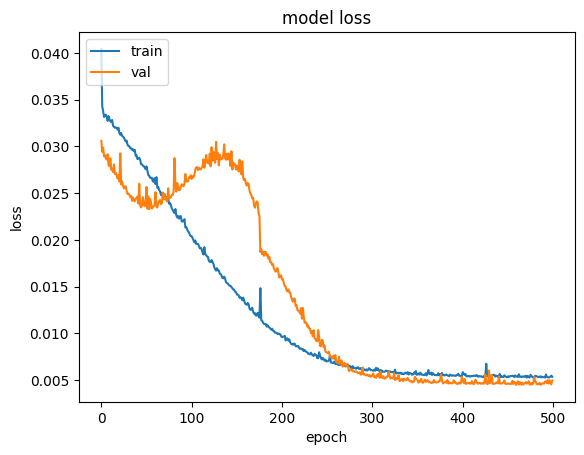

Raiz do Erro medio quadratico = 0.2290794727620508
0.8944565198421195


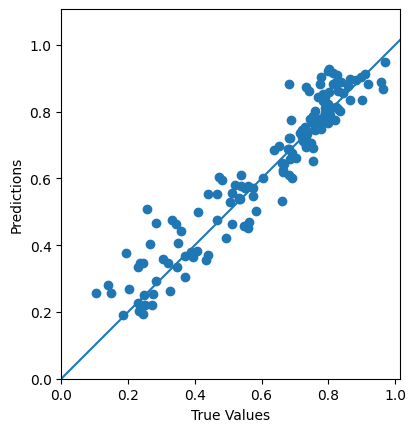

In [ ]:
#divisão dos dados de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

import tensorflow as tf
# define o modelo

def neural(X_train):
    model = Sequential()
    model.add(Dense(200, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(300, activation='relu'))

    model.add(Dense(1, activation='linear'))
    return model

#execução da rede
model = neural(X_train)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=adam)
history = model.fit(X_train, Y_train, epochs=500, verbose=1, validation_data=(X_test,Y_test))

#plot do erro do treino e validação dos dados
prediction = model.predict(X_test)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#plot dos dados preditos
plt.scatter(Y_test, prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

#erro quadratico médio
a = prediction-Y_test
rmse = np.sqrt(np.power(np.sum(a),2)/a.shape[0])
print('Raiz do Erro medio quadratico = '+str(rmse))

r2 = r2_score(Y_test, prediction)
print(r2)

In [ ]:
y = scalarY.inverse_transform(prediction)
y_teste = scalarY.inverse_transform(Y_test)
print(y-y_teste)


[[-8.90724182e-01]
 [-4.21929359e+00]
 [ 1.15396500e-01]
 [ 2.05524445e-01]
 [ 8.09959412e-01]
 [ 2.82908440e+00]
 [-1.10206223e+00]
 [ 1.84646715e+00]
 [ 5.49068451e-01]
 [-3.00162315e+00]
 [-1.27521515e-01]
 [ 2.91621908e+00]
 [ 4.09439468e+00]
 [ 3.73796082e+00]
 [ 4.69780350e+00]
 [ 4.30086899e+00]
 [ 3.91545486e+00]
 [ 7.01618195e-01]
 [ 1.05209732e+00]
 [ 4.55255508e-01]
 [ 3.46431732e-02]
 [ 4.02461624e+00]
 [ 1.85251645e+00]
 [-6.46305084e-02]
 [ 5.05739689e+00]
 [ 3.31414795e+00]
 [ 3.42649269e+00]
 [ 1.29301325e+00]
 [-1.65235247e-01]
 [-2.34003639e+00]
 [-1.74331665e-03]
 [ 3.13915253e-01]
 [ 4.51742472e+00]
 [ 5.59928894e-01]
 [-2.89686339e+00]
 [ 1.70934677e+00]
 [-2.07012844e+00]
 [ 2.19493739e+00]
 [-2.26535483e+00]
 [-6.49547577e-01]
 [-2.02726364e-01]
 [-4.64660645e-01]
 [-3.20160675e+00]
 [-7.37625122e-01]
 [-3.38262558e-01]
 [ 1.97186089e+00]
 [ 2.76815796e+00]
 [ 1.77036285e+00]
 [ 8.13259125e-01]
 [-2.12414714e+00]
 [ 2.22950745e+00]
 [-2.14876366e+00]
 [ 1.2887821